# Part A - Bollywood data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./../data/bollywood.csv")

In [3]:
df.head()

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
#creating new column ROI with expenses and revenue

df.insert(6,"ROI",(df['BoxOfficeCollection']/df['Budget'])-1)

In [5]:
df.head()

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,ROI,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,18-Apr-14,2 States,LW,Romance,36,104.00,1.888889,8576361,26622,2527
1,4-Jan-13,Table No. 21,N,Thriller,10,12.00,0.200000,1087320,1129,137
2,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,-0.600000,572336,586,54
3,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,-0.950000,42626,86,19
4,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,-0.400000,3113427,4512,1224


# 1. How many moves got related in each genre? Sort number of releases in each genre in descending order

In [6]:
dfg = df.groupby('Genre')['MovieName'].count()

In [7]:
dfg.sort_values(ascending = False)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: MovieName, dtype: int64

# 2. Which month of the year maximum number of movie releases are seen?

In [8]:
# converting Release Date into datetime data type
df['Release Date'] = pd.to_datetime(df['Release Date'])

# generating a year column to extract the date from the column Release Date
df['Year'] = df['Release Date'].dt.year

# finding the year when the maximum number of movies were released
df.Year.value_counts()

2014    70
2013    67
2015    12
Name: Year, dtype: int64

# 3. Which are the top 10 movies with maximum return on investment?

In [9]:
HROI = df.sort_values(by = ['ROI'], ascending = False)

HROI.head(10)

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,ROI,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year
64,2013-04-26,Aashiqui 2,N,Romance,12,110.0,8.166667,2926673,4944,628,2013
89,2014-12-19,PK,HS,Drama,85,735.0,7.647059,13270623,43767,5693,2014
132,2013-09-13,Grand Masti,LW,Comedy,35,298.0,7.514286,1795640,3015,721,2013
135,2013-09-20,The Lunchbox,N,Drama,10,85.0,7.500000,1064854,4054,285,2013
87,2013-06-14,Fukrey,N,Comedy,5,36.2,6.240000,227912,222,39,2013
58,2014-09-05,Mary Kom,N,Drama,15,104.0,5.933333,6086811,26560,1647,2014
128,2013-10-18,Shahid,FS,Drama,6,40.0,5.666667,1148516,3155,396,2013
37,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,5.500000,6604595,14535,2208,2014
101,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,4.466667,2635390,4622,456,2013
115,2013-08-09,Chennai Express,FS,Comedy,75,395.0,4.266667,1882346,7954,1593,2013


#  4. Is there a correlation between box office collection and YouTube likes?

In [10]:
correl = df[['BoxOfficeCollection','YoutubeLikes']].corr()
correl

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


### Above matrix reflects that both Boxoffice collection and youtube likes are positively correlated and 100% increase in Box office collection leads to 68% hike in Youtube likes

#  5. Which of the variables are highly correlated? Draw pair plot or heatmap

In [11]:
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()

<AxesSubplot: >

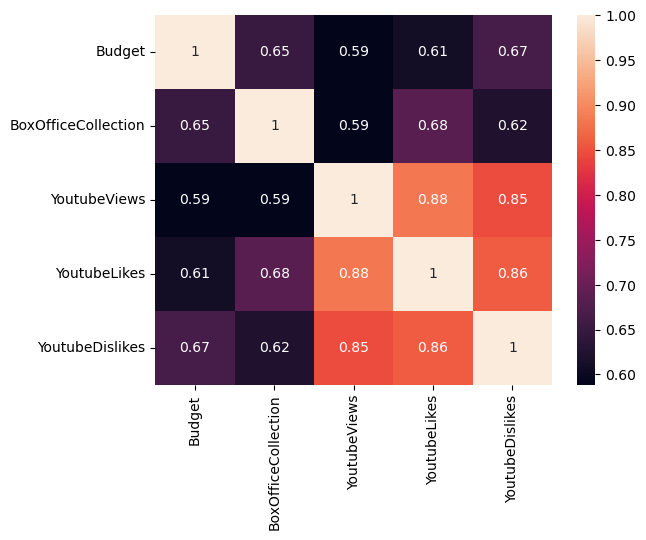

In [12]:
sns.heatmap(corr, annot=True)

### From the above heatmap we can observe that the correlation between Youtube Views, Youtube likes and Youtube dislikes is high

#  6. Calculate the Average Boxoffice collection for all releasetime (hint: group by)

In [13]:
print(df.groupby('ReleaseTime')['BoxOfficeCollection'].mean())

ReleaseTime
FS    89.535294
HS    74.619444
LW    98.322000
N     39.942828
Name: BoxOfficeCollection, dtype: float64


# 7. List the movies that are successful despite lousy feedback?

In [14]:
#using numpy to insert a column for feedback type based on likes and dislikes

import numpy as np

In [15]:
df.insert(10,"feedback", np.where(df['YoutubeDislikes'] >= df['YoutubeLikes'],'Lousy','Normal'))

In [16]:
df.sort_values(by = ['feedback','ROI'], ascending = [True, False])

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,ROI,YoutubeViews,YoutubeLikes,YoutubeDislikes,feedback,Year
131,2013-09-06,Shuddh Desi Romance,LW,Romance,25,55.00,1.200000,5142,1,1,Lousy,2013
54,2013-03-29,Himmatwala,N,Action,50,100.00,1.000000,2501277,1,1,Lousy,2013
39,2014-06-20,Humshakals,HS,Comedy,75,63.70,-0.150667,6280868,1,1,Lousy,2014
85,2014-05-09,Yeh Hai Bakrapur,HS,Comedy,5,2.00,-0.600000,1257416,758,923,Lousy,2014
53,2013-03-22,Sona Spa,N,Thriller,10,0.24,-0.976000,79430,61,112,Lousy,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
103,2014-04-25,Samrat and Co.,N,Thriller,18,2.00,-0.888889,371133,532,180,Normal,2014
67,2014-05-02,Purani Jeans,HS,Romance,10,1.10,-0.890000,1537063,822,229,Normal,2014
121,2013-11-08,Satya 2,FS,Thriller,15,1.10,-0.926667,110315,89,26,Normal,2013
49,2014-05-02,Kya Dilli Kya Lahore,HS,Drama,7,0.50,-0.928571,492344,2018,64,Normal,2014


### shudh desi romance and Himmat wala are the movies that are successfull inspite of their lousy feedback

# Part B Data concerns city-cycle fuel consumption

# 1. Perform Univariate Analysis

In [17]:
df1 = pd.read_csv('./../data/Auto.csv')

In [18]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


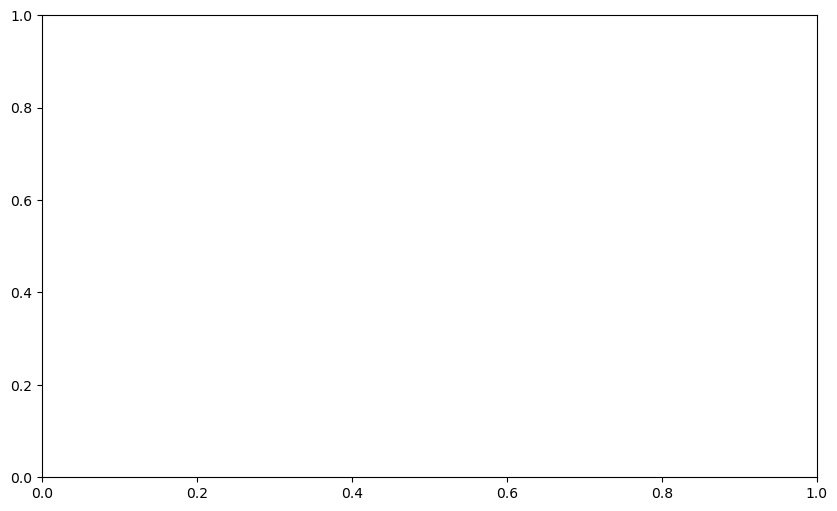

In [19]:
fig, ax = plt.subplots(figsize = (10,6))

<AxesSubplot: xlabel='horsepower', ylabel='Count'>

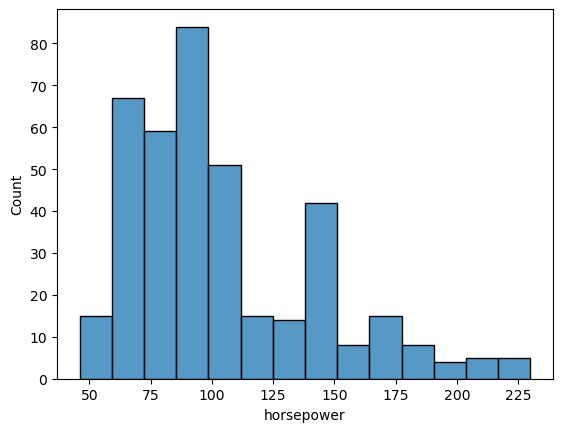

In [20]:
sns.histplot(data=df1, x = 'horsepower')

### Obseravation: Majority of the vehicles have horepower between 75-100

<AxesSubplot: xlabel='origin', ylabel='count'>

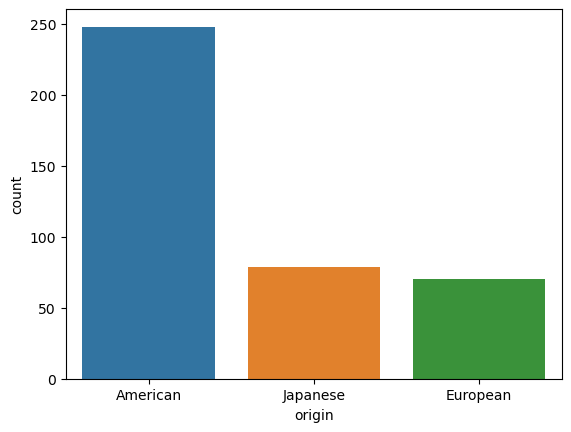

In [21]:
sns.countplot(data = df1, x='origin')

### Obseravation: Majority of vehicles are of America origin

<AxesSubplot: ylabel='mpg'>

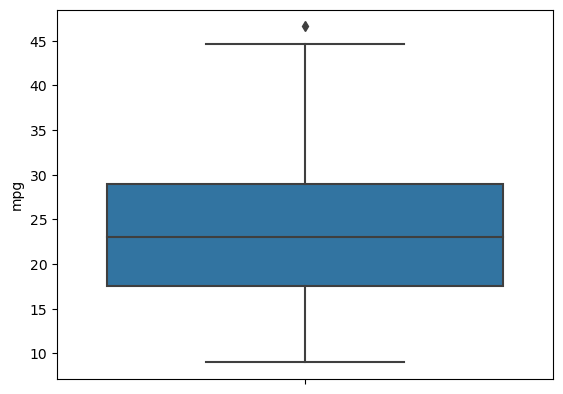

In [22]:
sns.boxplot(data = df1, y = 'mpg')

### Obseravation: 50% of cars have MPG ranging from 15- 30 miles per gallon

# 2. Perform at least three bivariate/multivariate analyses. It has to be relevant for the context.  You have to write the insights/interpretation of these graphs.

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

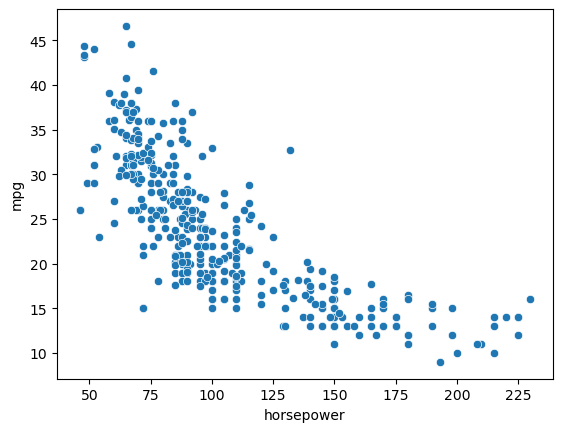

In [23]:
sns.scatterplot(data = df1, x = 'horsepower', y ='mpg' )

### Obseravation: mpg and horsepower are negatively correlated. i.e with each increase in horse power there is a certain decrease in mpg

<AxesSubplot: xlabel='weight', ylabel='acceleration'>

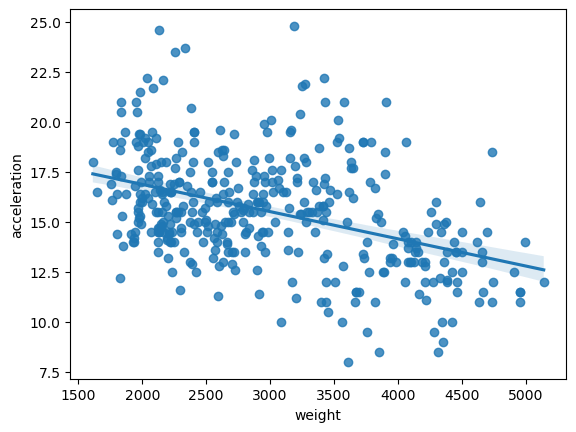

In [24]:
sns.regplot(data = df1, x = 'weight', y = 'acceleration')

### Obseravation: acceleration and weight are negatively correlated in most cases. it can be observed that in most cases acceleration factor decreased with increase in weight but there are a few exceptions

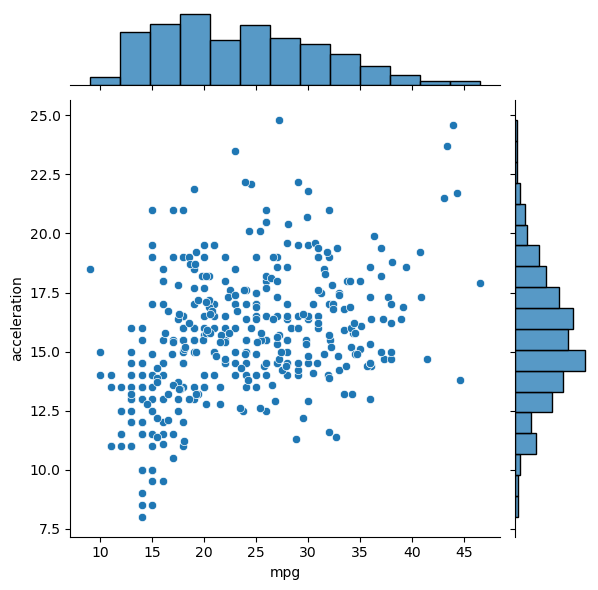

In [25]:
sns.jointplot(data = df1, y = 'acceleration', x = 'mpg' )

### Obseravation: Above joint plot illustrates that most cars have acceleration factor ranging between 12.5 to 15 and mpg ranging from 15 - 22. Also with every increase in mpg there is an increase in acceleration in most cases

# 3. Is there any missing data? How to deal the missing values? 

In [26]:
#checking for nan values(missing data)

df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


### There are 5 missing values out of 397 in horse power column

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [30]:
sorted = df1.sort_values(by ='horsepower', ascending = True)
sorted.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,American,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,American,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,European,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,American,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,European,renault 18i


In [31]:
#filling na with forward fill method
Nonnull_data = df1.fillna(method = 'ffill')

In [32]:
Nonnull_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB
